# Conducting linear regression in python

In [1]:
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats

import OLS_Rplots

In [2]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston['feature_names']
boston_df['MEDV'] = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Set Characteristics
(Taken from boston['DESCR'])
- CRIM:     per capita crime rate by town        
- ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.        
- INDUS:    proportion of non-retail business acres per town        
- CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)        
- NOX:      nitric oxides concentration (parts per 10 million)        
- RM:       average number of rooms per dwelling        
- AGE:      proportion of owner-occupied units built prior tproo 1940        
- DIS:      weighted distances to five Boston employment centres       
- RAD:      index of accessibility to radial highways        
- TAX:      full-value property-tax rate per \$10,000
- PTRATIO:  pupil-teacher ratio by town       
- B:        1000(Bk - 0.63)^2 where Bk is the proportion of [African-Americans] by town
- LSTAT:    lower status of the population        
- MEDV:     Median value of owner-occupied homes in \$1000's

## Conducting the regression

In [3]:
model = smf.ols(formula='MEDV ~ CRIM + CHAS + ZN', data=boston_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     59.67
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           5.23e-33
Time:                        10:09:44   Log-Likelihood:                -1763.1
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     502   BIC:                             3551.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.9715      0.449     48.937      0.0

# Making the plots in an R OLS
1. Residuals vs. Fitted
2. Normal QQ plot
3. Scale - Location Plot
4. Residuals vs. Leverage

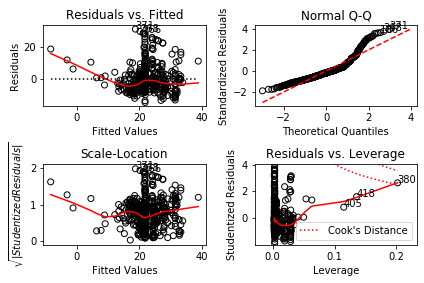

In [4]:
OLS_Rplots.allplots(results)
plt.show()

### 1. Residuals vs. Fitted

In [5]:
residuals = results.resid
fitted = results.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

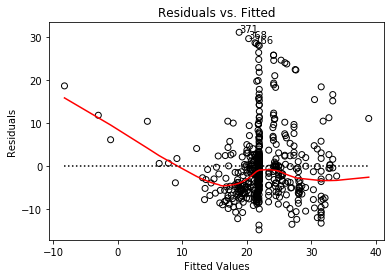

In [6]:
#plt.rcParams.update({'font.size': 16})
#plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':')

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

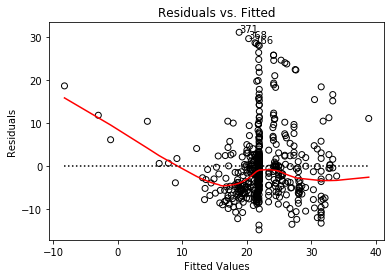

In [7]:
OLS_Rplots.Rplot1(fitted_model = 'none',resids = residuals,fits = fitted)
plt.show()

## 2. Normal QQ Plot

In [8]:
norm_residuals = results.get_influence().resid_studentized_internal

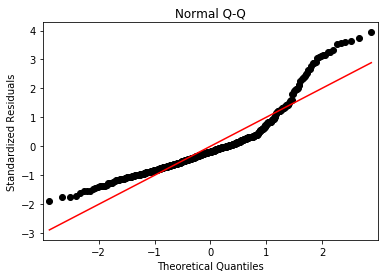

In [9]:
#default is a standard normal distribution
#line = 's' plots the line after standardizing for mean and standard deviation of the samples
fig, ax = plt.subplots()
sm.qqplot(norm_residuals, line = 's', ax = ax, color = 'k')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
plt.show()

In [10]:
norm_residuals = results.get_influence().resid_studentized_internal
sorted_norm_residuals = pd.Series(norm_residuals).sort_values(ascending = False)
top3 = pd.Series(abs(norm_residuals)).sort_values(ascending = False)[:3]

In [11]:
temp = sorted_norm_residuals.copy().reset_index()
sortedidx = temp[temp.iloc[:,1].isin(top3)].index

In [12]:
theoretical_quantiles = pd.Series(stats.probplot(sorted_norm_residuals, dist = 'norm', fit = False)[0])\
                                  .sort_values(ascending = False)

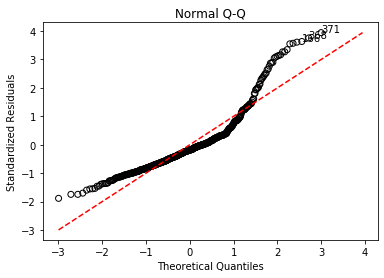

In [13]:
fig, ax = plt.subplots()
x = theoretical_quantiles
y = sorted_norm_residuals
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for i, val in enumerate(top3.index):
    ax.annotate(val,xy=(theoretical_quantiles.iloc[sortedidx[i]],sorted_norm_residuals[val]))
plt.show()

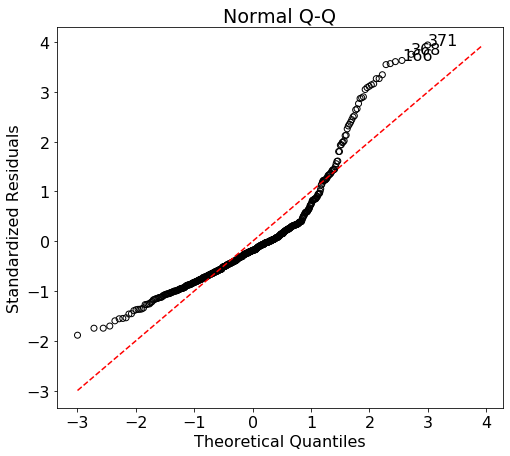

In [14]:
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
OLS_Rplots.Rplot2(results)
plt.show()

## 3. Scale - location plot

In [15]:
#calculate studentized residuals
norm_residuals = results.get_influence().resid_studentized_internal
sqrt_norm_residuals = pd.Series(np.sqrt(np.abs(norm_residuals)))
smoothed = lowess(sqrt_norm_residuals,fitted)
top3 = abs(sqrt_norm_residuals).sort_values(ascending = False)[:3]

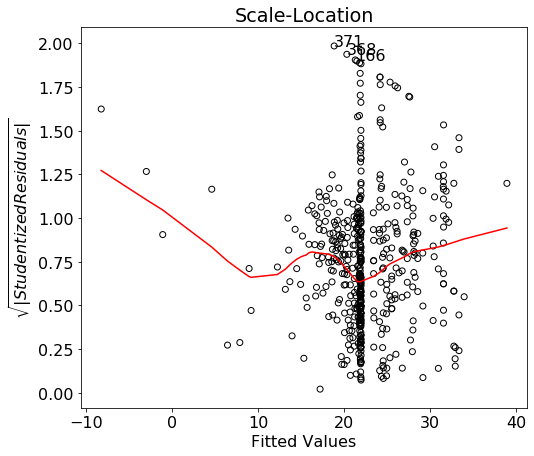

In [16]:
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, sqrt_norm_residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('$\sqrt{|Studentized Residuals|}$')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],sqrt_norm_residuals[i]))
plt.show()

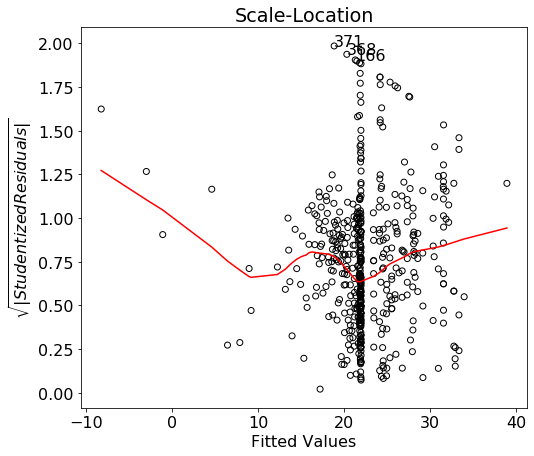

In [17]:
OLS_Rplots.Rplot3(results)
plt.show()

## 4. Residuals vs. Leverage

In [18]:
leverage = results.get_influence().hat_matrix_diag
smoothed = lowess(norm_residuals,leverage)
top3 = abs(pd.Series(leverage)).sort_values(ascending = False)[:3]

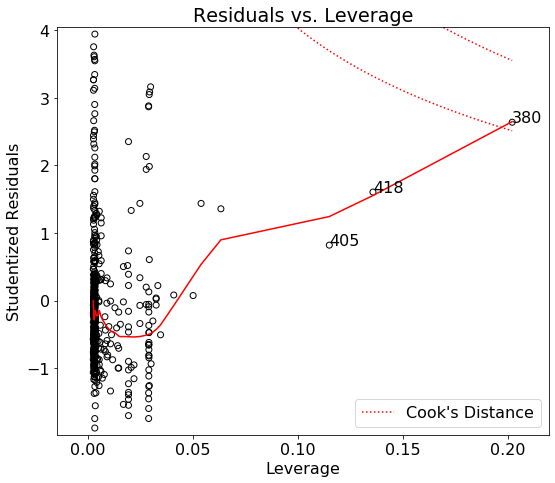

In [19]:
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(leverage, norm_residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Leverage')
ax.set_title('Residuals vs. Leverage')
ax.set_ylim(min(norm_residuals)-0.1,max(norm_residuals)+0.1)
# Save the figure and show
plt.tight_layout()
#plt.savefig('Category1SpendingAllClust.png', dpi = 300, bbox_inches = 'tight')
for i in top3.index:
    ax.annotate(i,xy=(leverage[i],norm_residuals[i]))
    
cooksx = np.linspace(min(leverage), max(leverage), 50)
p = len(results.params)
poscooks1y = np.sqrt((p*(1-cooksx)**2)/cooksx)
poscooks05y = np.sqrt(0.5*(p*(1-cooksx)**2)/cooksx)
negcooks1y = -np.sqrt((p*(1-cooksx)**2)/cooksx)
negcooks05y = -np.sqrt(0.5*(p*(1-cooksx)**2)/cooksx)

ax.plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks1y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
ax.legend()
plt.show()

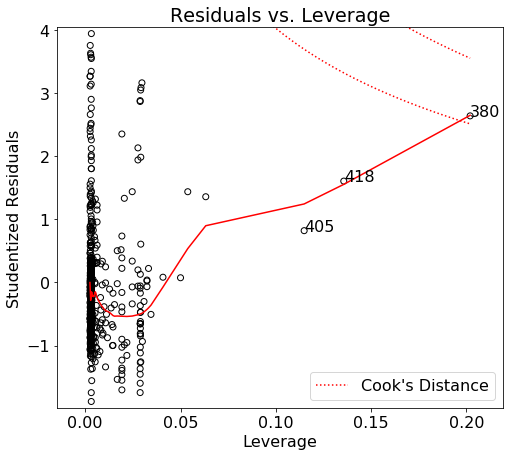

In [20]:
OLS_Rplots.Rplot4(results)
plt.show()